In [66]:
import functools
import matplotlib.pyplot as plt
import numpy as np

# 1. 算術平均

- 相加平均とも言う。
- いわゆる普通の平均。
- 外れ値の影響を受けやすい。

$$
\begin{align}
\overline{x}=\frac{\sum_{i=1}^{n} {x_i}}{n}
\end{align}
$$

In [2]:
data = [64, 25, 87, 56, 61, 96, 91, 98, 12, 88, 50, 45, 65, 42, 65, 66, 47, 21, 82, 58]
sum(data)/len(data)

60.95

# 2. 加重平均

- 項目ごとに重み付けをした平均。


$$
\begin{align}
\overline{x_w}=\frac{\sum_{i=1}^{n} {w_i}{x_i}}{\sum_{i=1}^{n} {w_i}}
\end{align}
$$

## 算術平均

In [64]:
scores = {'数学' : 60, '英語' : 80, '物理' : 70}

sum(list(scores.values()))/3

70.0

## 加重平均

In [65]:
scores = {'数学' : 60, '英語' : 80, '物理' : 70}
weighted_scores = dict([(k, (v*2) if (k == '数学') else (v)) for k,v in scores.items()])

sum(list(weighted_scores.values()))/4

67.5

- 数学は他教科の2倍の重み付けをしている。ここでは数学の点数が低いため、通常の平均値70点よりも低い平均点となっている。

# 3. 幾何平均

- 相乗平均とも言う。
- データの積のn乗根を取る。
- 外れ値の影響を受けにくい。
- 変化率の平均など、比率の平均値にも適している。

$$
\begin{align}
\overline{m_g}=\sqrt[n]{\prod_{i=1}^{n} {x_i}}
\end{align}
$$

## 外れ値があるケース

### 算術平均

In [3]:
data = [1, 2, 3, 1, 2, 3, 9]
sum(data)/len(data)

3.0

### 幾何平均

In [4]:
data = [1, 2, 3, 1, 2, 3, 9]
functools.reduce((lambda x, y : x * y), data)**(1/len(data))

2.2837538219638014

- 幾何平均の方が外れ値の影響を受けていない

## 変化率の場合

初期値100として、前回比150%, 200%, 250%, 300%, 350%に推移した場合

In [5]:
first_value = 100
data = [1.5, 2.0, 2.5, 3.0, 3.5]

functools.reduce((lambda x, y : x * y), data, first_value)

7875.0

### 算術平均

In [6]:
data = [1.5, 2.0, 2.5, 3.0, 3.5]
sum(data)/len(data)

2.5

In [7]:
first_value = 100
data = [2.5, 2.5, 2.5, 2.5, 2.5]

functools.reduce((lambda x, y : x * y), data, first_value)

9765.625

### 幾何平均

In [8]:
data = [1.5, 2.0, 2.5, 3.0, 3.5]
functools.reduce((lambda x, y : x * y), data)**(1/len(data))

2.3946944765934943

In [9]:
first_value = 100
data = [2.3946944765934943 for i in range(5)]

functools.reduce((lambda x, y : x * y), data, first_value)

7875.000000000002

- 幾何平均の方が実際の値に近くなっていることがわかる

# 4. 移動平均

- 時系列のデータに対して、変化を緩やかにするのに使う。

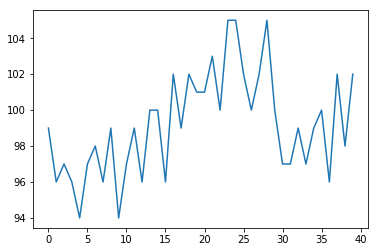

In [10]:
data = [99, 96, 97, 96, 94, 97, 98, 96, 99, 94, 97, 99, 96, 100, 100, 96, 102, 99, 102, 101, 101, 103, 100, 105, 105, 102, 100, 102, 105, 100, 97, 97, 99, 97, 99, 100, 96, 102, 98, 102]

plt.plot(data)

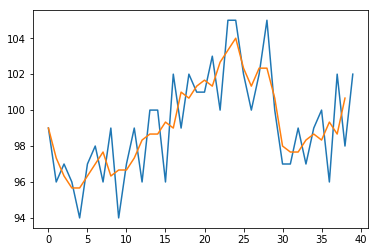

In [13]:
data = [99, 96, 97, 96, 94, 97, 98, 96, 99, 94, 97, 99, 96, 100, 100, 96, 102, 99, 102, 101, 101, 103, 100, 105, 105, 102, 100, 102, 105, 100, 97, 97, 99, 97, 99, 100, 96, 102, 98, 102]

# ちょうどよいshiftメソッドがないので自作。ここは本質ではない
import copy
def shift_left(data, size):
    if (size == 0):
        return data
    result = copy.copy(data)
    result.pop(0)
    return shift_left(result, size - 1)
# 

tmp = list(zip(data, shift_left(data, 1), shift_left(data, 2)))
moving_average = [data[0]] + list(map(lambda x : (x[0]+x[1]+x[2])/3, tmp))

plt.plot(data)
plt.plot(moving_average)

- 元のデータ（青線）に対して、移動平均の値（赤線）の方が変化の傾向が読みやすくなっているのがわかる